### Import necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import requests
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import pickle

### loading datasets

In [3]:
df_remax=pd.read_csv('remax_vente.csv')

In [4]:
df_star_vente=pd.read_csv('properstar_vente.csv')
df_star_vente_commercial=pd.read_csv('properstar_commercial_vente.csv')
df_star=pd.concat([df_star_vente,df_star_vente_commercial])

## Data exploration

### Properstar data

In [5]:
df_star.head(3)

,statut,link,title,address,prix,Pièces,Etages,Chambres,Salles de bains,Toilettes,...,Vue sur la forêt,Vue sur la montagne,Centre de remise en forme,Hammam,Vue du village,Vue du port,Vue sur la campagne,Garage,Vue sur la verdure,Vue sur le parc
0,Vente,https://www.properstar.fr/annonce/104215563,"Maison à vendre à Ez Zahra, Tunisie",Ez Zahra,250 €,7.0,1.0,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vente,https://www.properstar.fr/annonce/102753772,"Appartement à vendre à Jardins de Carthage, Tu...",Jardins De Carthage,130 929 €,2.0,9.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vente,https://www.properstar.fr/annonce/104409743,"Appartement à vendre à Gammarth, Tunisie",Gammarth,418 372 €,6.0,2.0,5.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_star.shape

(521, 93)

In [7]:
df_star.columns

Index(['statut', 'link', 'title', 'address', 'prix', 'Pièces', 'Etages',
       'Chambres', 'Salles de bains', 'Toilettes', 'Places de parc extérieur',
       'Habitable', 'Total', 'Alarme', '1', 'Ascenseur', 'Balcon', 'Type',
       'Année de construction', 'Appartements', 'Piscine', 'Terrasse',
       'Climatisation', 'Concierge 24/7', 'Internet', 'Parking', 'Sécurité',
       'Aéroport', 'Autoroute', 'Centre-ville', 'Ecole primaire / élémentaire',
       'Ecole secondaire', 'Garderie', 'Hôpital ou clinique', 'Magasins',
       'Université', 'Orientation Nord', 'Vue de la rue', 'Vue du ciel',
       'Condition', 'Chauffage', 'Eau chaude', 'Déchets des eaux usées',
       'Centre de sport', 'Docteur', 'Parking public', 'Supermarché', 'Taxi',
       'Transports publics', 'Standing', 'Terrain', 'Jardin', 'Meublé',
       'Places de parc intérieures', 'Machine à laver',
       'Télévision par satellite', 'Parc', 'Année de rénovation', 'Interphone',
       'Station de ski', 'Orientation N

In [10]:
df_star.isna().sum().sort_values(ascending=True).head(25)

statut                     0
link                       0
prix                       0
title                      9
address                    9
Pièces                    62
1                         63
Habitable                 72
Type                      90
Total                    120
Etages                   218
Chambres                 270
Année de construction    272
Salles de bains          283
Condition                288
Climatisation            291
Chauffage                305
Toilettes                315
Alarme                   322
Eau chaude               324
Centre-ville             339
Magasins                 350
Ascenseur                355
Transports publics       361
Mer                      362
dtype: int64

### Remax

In [111]:
df_remax.head()

,statut,link,title,prix,address,statut_marche,m²,Surface constructible (m²),Année/Mois de Construction,Places de parking,...,Upgraded interior,Energy Efficient,Tennis Court,Année de construction,Baie Vitrée,Garage avec porte automatisée,Garage individuel,Brique,Accès facile en voiture,Villa
0,Vente,https://www.remax.com.tn/fr-tn/biens/apparteme...,Appartement - Vente - Ennasr 1-2 Ariana Tunisie,"386,000 TND",Ennasr 1-2 - Ariana - Tunisie,Nouveau sur le marché,122,122,2018/01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vente,https://www.remax.com.tn/fr-tn/biens/terrain-a...,Terrain agricole - Vente - Enfida Sousse Tunisie,"500,000 TND",Enfida - 4030 - Enfida - Sousse - Tunisie,Excellente valeur,"250,000",100,2019/12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vente,https://www.remax.com.tn/fr-tn/biens/etage-de-...,Etage de Maison/ Villa - Vente - Hammam Ghezèz...,"2,000,000 TND",Hammam Ghezèze - Nabeul - Tunisie,Nouveau sur le marché,790,600,2025/01,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vente,https://www.remax.com.tn/fr-tn/biens/building/...,Building - Vente - Hammamet Nabeul Tunisie,"950,000 TND",Cité Jawaher 1 - 8050 - Hammamet - Nabeul - Tu...,Excellente valeur,304,769,2024/03,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vente,https://www.remax.com.tn/fr-tn/biens/villa/ven...,Villa - Vente - Akouda Sousse Tunisie,"490,000 TND",Akouda - Akouda - Sousse - Tunisie,Nouvelle Construction,182,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
df_remax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Columns: 148 entries, statut to Villa
dtypes: float64(136), object(12)
memory usage: 674.2+ KB


In [113]:
df_remax.columns

Index(['statut', 'link', 'title', 'prix', 'address', 'statut_marche', 'm²',
       'Surface constructible (m²)', 'Année/Mois de Construction',
       'Places de parking',
       ...
       'Upgraded interior', 'Energy Efficient', 'Tennis Court',
       'Année de construction', 'Baie Vitrée', 'Garage avec porte automatisée',
       'Garage individuel', 'Brique', 'Accès facile en voiture', 'Villa'],
      dtype='object', length=148)

In [114]:
df_remax.isna().sum().sort_values(ascending=True).head(10)

statut                          0
link                            0
title                           0
prix                            0
address                         0
m²                             75
statut_marche                 135
Surface constructible (m²)    154
Nombre de pièces              198
Nombre de chambres            208
dtype: int64

## Data preprocessing

### Column selection

In [115]:
columns_to_keep=['address','Type', 'Habitable', 'Total','Terrain',
       'Pièces', 'Salles de bains', 'Chambres','Garage','Jardin','Balcon','Meublé','Piscine','Etages', 'prix']
df_star=df_star[columns_to_keep]
df_star.head()

,address,Type,Habitable,Total,Terrain,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix
0,Ez Zahra,NaN,380 m²,380 m²,NaN,7.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,250 €
1,Jardins De Carthage,Appartement,103 m²,103 m²,NaN,2.0,1.0,1.0,NaN,NaN,Balcon,NaN,NaN,9.0,130 929 €
2,Gammarth,Appartement,354 m²,354 m²,NaN,6.0,5.0,5.0,NaN,NaN,Balcon,NaN,Piscine,2.0,418 372 €
3,Sousse,Appartement,135 m²,155 m²,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,177 281 €
4,Sousse,Maison,630 m²,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174 572 €


In [116]:
df_star.info()

<class 'pandas.core.frame.DataFrame'>
Index: 521 entries, 0 to 27
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          512 non-null    object 
 1   Type             431 non-null    object 
 2   Habitable        449 non-null    object 
 3   Total            401 non-null    object 
 4   Terrain          118 non-null    object 
 5   Pièces           459 non-null    float64
 6   Salles de bains  238 non-null    float64
 7   Chambres         251 non-null    float64
 8   Garage           1 non-null      object 
 9   Jardin           10 non-null     object 
 10  Balcon           125 non-null    object 
 11  Meublé           88 non-null     object 
 12  Piscine          94 non-null     object 
 13  Etages           303 non-null    float64
 14  prix             521 non-null    object 
dtypes: float64(4), object(11)
memory usage: 65.1+ KB


In [117]:
columns_to_keep=['title','address', 'm²', 'Surface constructible (m²)','Surface Terrain (m²)',
       'Nombre de pièces', 'Nombre salles de bain', 'Nombre de chambres',
       'Garage','Garage individuel','Garage avec porte automatisée','Jardin',
       'Balcon','Meublé','Piscine','Piscine extérieure',"Nombre d'étages", 'prix']
df_remax=df_remax[columns_to_keep]
df_remax.head(3)


,title,address,m²,Surface constructible (m²),Surface Terrain (m²),Nombre de pièces,Nombre salles de bain,Nombre de chambres,Garage,Garage individuel,Garage avec porte automatisée,Jardin,Balcon,Meublé,Piscine,Piscine extérieure,Nombre d'étages,prix
0,Appartement - Vente - Ennasr 1-2 Ariana Tunisie,Ennasr 1-2 - Ariana - Tunisie,122,122,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"386,000 TND"
1,Terrain agricole - Vente - Enfida Sousse Tunisie,Enfida - 4030 - Enfida - Sousse - Tunisie,"250,000",100,"250,000",2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"500,000 TND"
2,Etage de Maison/ Villa - Vente - Hammam Ghezèz...,Hammam Ghezèze - Nabeul - Tunisie,790,600,660,5.0,7.0,8.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,"2,000,000 TND"


In [118]:
df_remax.rename(columns={
    'm²': 'Habitable',
    'Surface constructible (m²)': 'Terrain',
    'Surface Terrain (m²)': 'Total',
    'Nombre de chambres':'Chambres',
    'Nombre de pièces':'Pièces',
    'Nombre salles de bain':'Salles de bains',
    "Nombre d'étages":'Etages'
}, inplace=True)
df_remax.head(1)

,title,address,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Garage individuel,Garage avec porte automatisée,Jardin,Balcon,Meublé,Piscine,Piscine extérieure,Etages,prix
0,Appartement - Vente - Ennasr 1-2 Ariana Tunisie,Ennasr 1-2 - Ariana - Tunisie,122,122,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"386,000 TND"


### Transforming column types and reshaping data

### properstar

#### Prix column

In [119]:
df_remax['prix'].sample(3)

9         755,000 TND
456       245,000 TND
253    Nous consulter
Name: prix, dtype: object

In [120]:
df_star['prix'].sample(3)
#prices are in euro => we need to convert them to TND

486    217 012 €
363            0
59     126 414 €
Name: prix, dtype: object

In [121]:
#update the price column
df_star['prix'] = df_star['prix'].apply(lambda x: str(x).replace('€','') if isinstance(x, str) else x)
df_star['prix'] = df_star['prix'].apply(lambda x: str(x).replace('\u202f', '') if isinstance(x, str) else x)
df_star['prix'] = df_star['prix'].apply(lambda x: str(x).replace(' ','') if isinstance(x, str) else x)
df_star['prix'] = df_star['prix'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df_star['prix'] = df_star['prix'].apply(lambda x: x + "000" if isinstance(x, str) and len(x) < 4 else x)
df_star['prix'] = pd.to_numeric(df_star['prix'], errors='coerce')


In [122]:
API_KEY = "cur_live_VxYPVVMtGszXGu8LDX9l4AbamFmdEfbOYFDt0ojS"  
API_URL = f"https://api.currencyapi.com/v3/latest?apikey={API_KEY}&currencies=TND&base_currency=EUR"
# Fetch exchange rate from API
response = requests.get(API_URL)
data = response.json()
# Extract the exchange rate
eur_to_tnd_rate = data['data']['TND']['value']
# Convert 'prix' column from EUR to TND
df_star['prix'] = df_star['prix'] * eur_to_tnd_rate
df_star['prix'] = df_star['prix'].apply(lambda x: str(int(x)) if isinstance(x, (int, float)) else x)
df_star['prix'] = pd.to_numeric(df_star['prix'], errors='coerce')


#### Habitable,Total and Terrain

In [123]:
df_star[['Habitable','Total','Terrain']].sample(1)

,Habitable,Total,Terrain
484,NaN,NaN,160 m²


In [124]:
df_remax[['Habitable','Total','Terrain']].sample(1)

,Habitable,Total,Terrain
144,245,245,120


In [125]:
def clean_size_column(df, col):
    """
    Cleans a size-related column by:
    1. Removing 'm²' and any non-breaking spaces.
    2. Stripping leading/trailing spaces.
    3. Converting cleaned values to numeric (float).
    4. Handling missing or invalid values gracefully.
    """
    df[col] = df[col].astype(str)  # Convert all to string to prevent errors
    df[col] = df[col].str.replace('m²', '', regex=False)  # Remove 'm²'
    df[col] = df[col].str.replace('\u202f', '', regex=False)  # Remove non-breaking spaces
    df[col] = df[col].str.replace(' ', '', regex=False)  # Remove normal spaces
    df[col] = df[col].str.strip()  # Strip leading/trailing spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, setting errors to NaN

# Example usage
columns_to_clean = ['Habitable', 'Total', 'Terrain']  # List of size-related columns
for col in columns_to_clean:
    clean_size_column(df_star, col)

# Check the cleaned columns
df_star[columns_to_clean].head()


,Habitable,Total,Terrain
0,380.0,380.0,NaN
1,103.0,103.0,NaN
2,354.0,354.0,NaN
3,135.0,155.0,NaN
4,630.0,NaN,NaN


#### Type column

In [126]:
df_star['Type'].value_counts()

Type
Appartement    293
Maison         125
Commercial      13
Name: count, dtype: int64

In [127]:
df_star['Type'] = df_star['Type'].replace({'Appartement': 'Residential','Maison':'Residential'})
df_star['Type'].value_counts()

Type
Residential    418
Commercial      13
Name: count, dtype: int64

### remax

#### title column

In [128]:
df_remax[['title']].sample(3)

,title
581,Terrain - Vente - Djerba - Midoun Médenine Tun...
157,Villa - Vente - El Menzah 6 Ariana Tunisie
106,Villa - Vente - Carthage Salambo Tunis Tunisie


In [129]:
df_remax['title'] = df_remax['title'].str.split('-').str[0]
# Remove trailing/leading spaces
df_remax['Type'] = df_remax['title'].str.strip()

# Handle specific cases for "1" and "6 and More"
df_remax = df_remax[ (df_remax['Type']!='6 and More') & (df_remax['Type']!='1') ]

# Optional: categorize property types
def categorize_property(property_type):
    if property_type in ["Appartement", "Villa", "Maison", "Duplex", "Penthouse", "Studio", "Résidence"]:
        return "Residential"
    elif property_type in ["Commercial", "Showroom", "Bureau", "Office", "Local Commercial", "Building"]:
        return "Commercial"
    elif property_type in ["Terrain", "Lot", "Land", "Agricole"]:
        return "Land"
    elif property_type in ["Hôtel", "Warehouse", "Usine", "Entrepôt", "Industrie"]:
        return "Industrial"
    else:
        return "Other"
df_remax['Type'] = df_remax['Type'].apply(categorize_property)
df_remax=df_remax.drop(columns=['title'])
df_remax['Type'].value_counts()

Type
Residential    354
Other          113
Land            90
Commercial      22
Name: count, dtype: int64

#### other columns

In [130]:
df_remax.sample(1)

,address,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Garage individuel,Garage avec porte automatisée,Jardin,Balcon,Meublé,Piscine,Piscine extérieure,Etages,prix,Type
314,2036 - Ain Zaghouan - Tunis - Tunisie,134,134,NaN,4.0,1.0,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,"340,000 TND",Residential


In [131]:
#change column types
df_remax['Habitable'] = df_remax['Habitable'].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df_remax['Habitable'] = pd.to_numeric(df_remax['Habitable'], errors='coerce')
df_remax['Total'] = df_remax['Total'].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df_remax['Total'] = pd.to_numeric(df_remax['Total'], errors='coerce')
df_remax['Terrain'] = df_remax['Terrain'].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df_remax['Terrain'] = pd.to_numeric(df_remax['Terrain'], errors='coerce')

df_remax['prix'] = df_remax['prix'].apply(lambda x: str(x).replace('TND','') if isinstance(x, str) else x)
df_remax['prix'] = df_remax['prix'].apply(lambda x: str(x).replace(',','') if isinstance(x, str) else x)
df_remax['prix'] = df_remax['prix'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df_remax['prix'] = pd.to_numeric(df_remax['prix'], errors='coerce')

columns_with_zero=['Garage','Garage individuel','Garage avec porte automatisée','Jardin','Balcon','Meublé','Piscine','Piscine extérieure']
for col in columns_with_zero:
    df_remax[col]=df_remax[col].fillna(0)
df_remax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 582
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   address                        579 non-null    object 
 1   Habitable                      503 non-null    float64
 2   Terrain                        425 non-null    float64
 3   Total                          296 non-null    float64
 4   Pièces                         383 non-null    float64
 5   Salles de bains                371 non-null    float64
 6   Chambres                       373 non-null    float64
 7   Garage                         579 non-null    float64
 8   Garage individuel              579 non-null    float64
 9   Garage avec porte automatisée  579 non-null    float64
 10  Jardin                         579 non-null    float64
 11  Balcon                         579 non-null    float64
 12  Meublé                         579 non-null    float64


In [132]:
df_remax.sample(1)

,address,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Garage individuel,Garage avec porte automatisée,Jardin,Balcon,Meublé,Piscine,Piscine extérieure,Etages,prix,Type
547,Jardins de Carthage - Tunis - Tunisie,160.0,160.0,NaN,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,778550.0,Residential


In [133]:
df_remax['Garage'] = df_remax[['Garage', 'Garage individuel', 'Garage avec porte automatisée']].max(axis=1)

In [134]:
df_remax['Piscine'] = df_remax[['Piscine', 'Piscine extérieure']].max(axis=1)

In [135]:
#drop columns that we don't need
columns_to_drop=['Garage individuel', 'Garage avec porte automatisée','Piscine extérieure']
df_remax=df_remax.drop(columns_to_drop,axis=1)
df_remax.head(1)

,address,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Type
0,Ennasr 1-2 - Ariana - Tunisie,122.0,122.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,2.0,386000.0,Residential


#### combine the two dataframes into one

In [136]:
df=pd.concat([df_remax,df_star])
print(df.shape)
df.head(3)

(1100, 15)


,address,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Type
0,Ennasr 1-2 - Ariana - Tunisie,122.0,122.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,2.0,386000.0,Residential
1,Enfida - 4030 - Enfida - Sousse - Tunisie,250.0,100.0,250.0,2.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,500000.0,Other
2,Hammam Ghezèze - Nabeul - Tunisie,790.0,600.0,660.0,5.0,7.0,8.0,0.0,1.0,1.0,0.0,0.0,2.0,2000000.0,Other


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 27
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          1091 non-null   object 
 1   Habitable        952 non-null    float64
 2   Terrain          543 non-null    float64
 3   Total            697 non-null    float64
 4   Pièces           842 non-null    float64
 5   Salles de bains  609 non-null    float64
 6   Chambres         624 non-null    float64
 7   Garage           580 non-null    object 
 8   Jardin           589 non-null    object 
 9   Balcon           704 non-null    object 
 10  Meublé           667 non-null    object 
 11  Piscine          673 non-null    object 
 12  Etages           635 non-null    float64
 13  prix             1008 non-null   float64
 14  Type             1010 non-null   object 
dtypes: float64(8), object(7)
memory usage: 137.5+ KB


### Data cleaning

In [138]:
df_clean=df.dropna(subset=['prix'])
df_clean.shape

(1008, 15)

In [139]:
df_clean['Jardin'].value_counts()

Jardin
0.0         279
1.0         208
Jardin        2
10000 m²      1
129 m²        1
330 m²        1
300 m²        1
270 m²        1
216 m²        1
421 m²        1
245 m²        1
Name: count, dtype: int64

In [140]:
df_clean['Jardin'].fillna(0,inplace=True)
df_clean['Jardin'] = df_clean['Jardin'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Jardin'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\3393552808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Jardin'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\3393552808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Jardin'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykern

Jardin
0    790
1    218
Name: count, dtype: int64

In [141]:
df_clean['Balcon'].value_counts()

Balcon
0.0       328
1.0       159
Balcon    125
Name: count, dtype: int64

In [142]:
df_clean['Balcon'].fillna(0,inplace=True)
df_clean['Balcon'] = df_clean['Balcon'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Balcon'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\234478673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Balcon'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\234478673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Balcon'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel

Balcon
0    724
1    284
Name: count, dtype: int64

In [143]:
df_clean['Meublé'].value_counts()

Meublé
0.0       431
Meublé     88
1.0        56
Name: count, dtype: int64

In [144]:
df_clean['Meublé'].fillna(0,inplace=True)
df_clean['Meublé'] = df_clean['Meublé'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Meublé'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\1602645294.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Meublé'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\1602645294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Meublé'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykern

Meublé
0    864
1    144
Name: count, dtype: int64

In [145]:
df_clean['Piscine'].value_counts()

Piscine
0.0        405
Piscine     94
1.0         82
Name: count, dtype: int64

In [146]:
df_clean['Piscine'].fillna(0,inplace=True)
df_clean['Piscine'] = df_clean['Piscine'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Piscine'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\2679576601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Piscine'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\2679576601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Piscine'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipyke

Piscine
0    832
1    176
Name: count, dtype: int64

In [147]:
df_clean['Garage'].value_counts()

Garage
0.0       315
1.0       172
Garage      1
Name: count, dtype: int64

In [148]:
df_clean['Garage'].fillna(0,inplace=True)
df_clean['Garage'] = df_clean['Garage'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Garage'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\51011127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Garage'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\51011127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Garage'].fillna(0,inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_1

Garage
0    835
1    173
Name: count, dtype: int64

In [149]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 27
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          999 non-null    object 
 1   Habitable        875 non-null    float64
 2   Terrain          480 non-null    float64
 3   Total            647 non-null    float64
 4   Pièces           776 non-null    float64
 5   Salles de bains  542 non-null    float64
 6   Chambres         557 non-null    float64
 7   Garage           1008 non-null   int64  
 8   Jardin           1008 non-null   int64  
 9   Balcon           1008 non-null   int64  
 10  Meublé           1008 non-null   int64  
 11  Piscine          1008 non-null   int64  
 12  Etages           575 non-null    float64
 13  prix             1008 non-null   float64
 14  Type             918 non-null    object 
dtypes: float64(8), int64(5), object(2)
memory usage: 126.0+ KB


In [150]:
def plot_distribution(data,title,xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)  # kde=True will add a kernel density estimate curve to visualize distribution smoothly
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

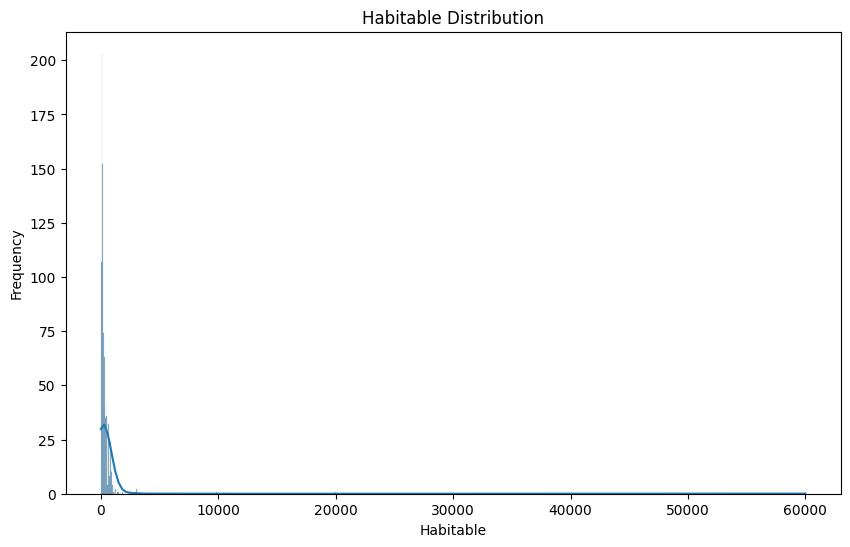

In [151]:
plot_distribution(df_clean['Habitable'],'Habitable Distribution','Habitable')

In [152]:
# Replace missing values with median since the distribution is skwed
df_clean['Habitable'].fillna(df_clean['Habitable'].median(), inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\1680901862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Habitable'].fillna(df_clean['Habitable'].median(), inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\1680901862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Habitable'].fillna(df_clean['Habitable

In [153]:
#df_clean = df_clean[(np.abs(stats.zscore(df_clean["Habitable"])) < 3)]

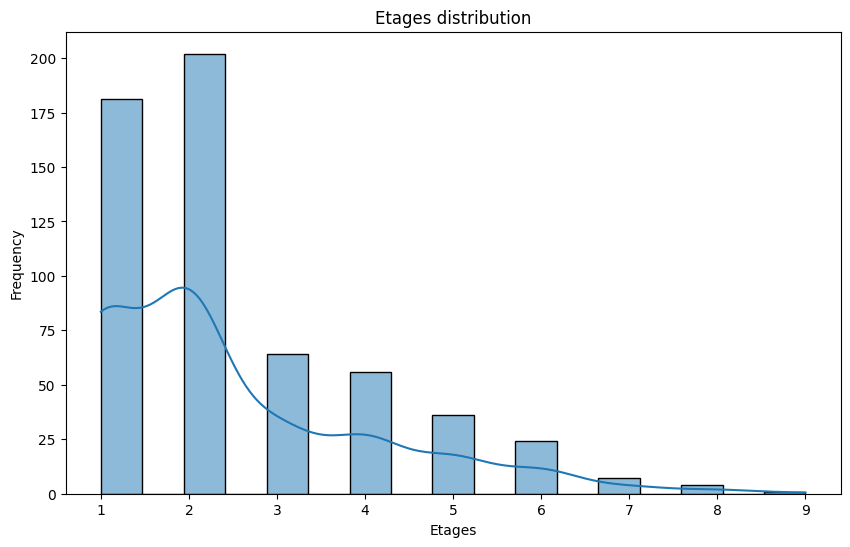

In [154]:
plot_distribution(df_clean['Etages'],'Etages distribution','Etages')

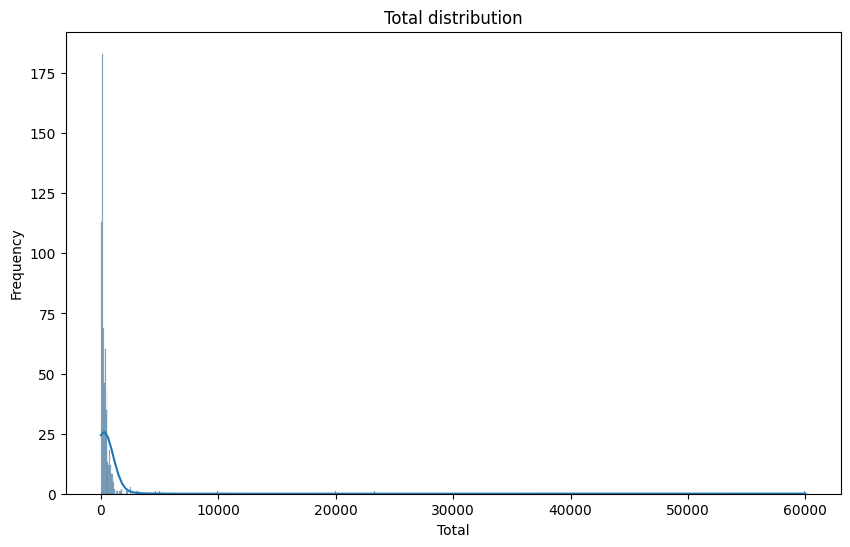

In [155]:
plot_distribution(df_clean['Total'],'Total distribution','Total')

In [156]:
# Replace missing values with median since the distribution is skwed
df_clean['Total'].fillna(df_clean['Total'].median(), inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\484258427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Total'].fillna(df_clean['Total'].median(), inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\484258427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Total'].fillna(df_clean['Total'].median(), inpla

In [157]:
df_clean['Terrain'] = df_clean['Terrain'].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df_clean['Terrain'] = pd.to_numeric(df_clean['Terrain'], errors='coerce')


C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\2018761651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Terrain'] = df_clean['Terrain'].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\2018761651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Terrain'] = pd.to_numeric(df_clean['Terrain'], errors='coerce')


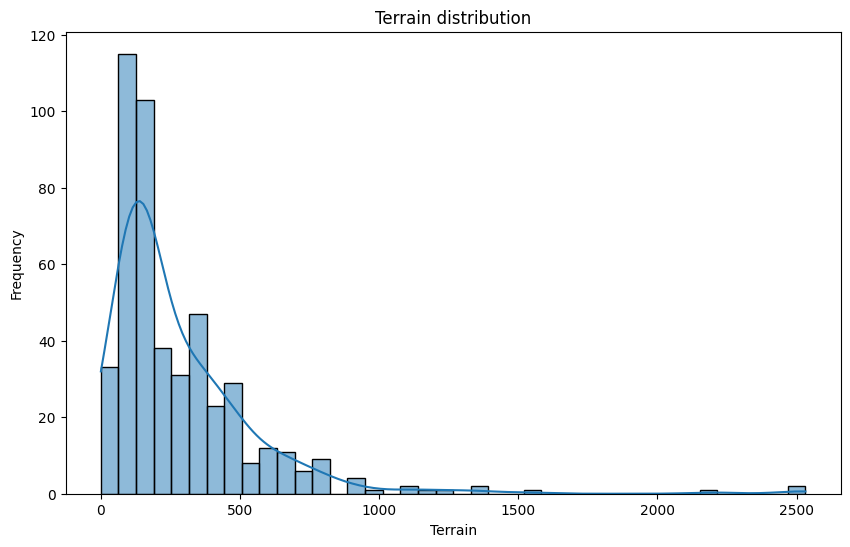

In [158]:
plot_distribution(df_clean['Terrain'],'Terrain distribution','Terrain')

In [159]:
df_clean['Terrain'].fillna(df_clean['Terrain'].median(), inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\69587176.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Terrain'].fillna(df_clean['Terrain'].median(), inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\69587176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Terrain'].fillna(df_clean['Terrain'].median(),

In [160]:
#df_clean = df_clean[(np.abs(stats.zscore(df_clean["Total"])) < 3)]

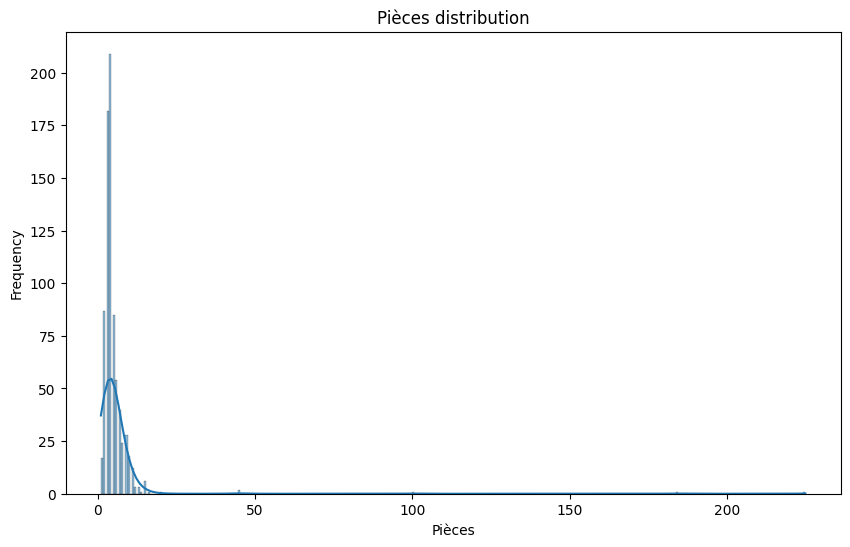

In [161]:
plot_distribution(df_clean['Pièces'],'Pièces distribution','Pièces')

In [162]:
# Replace missing values with median since the distribution is skwed
df_clean['Pièces'].fillna(df_clean['Pièces'].median(), inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\3906860705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Pièces'].fillna(df_clean['Pièces'].median(), inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\3906860705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Pièces'].fillna(df_clean['Pièces'].median(),

In [163]:
#df_clean = df_clean[(np.abs(stats.zscore(df_clean["Pièces"])) < 3)]

In [164]:
df_clean = df_clean[df_clean['Pièces']<20]

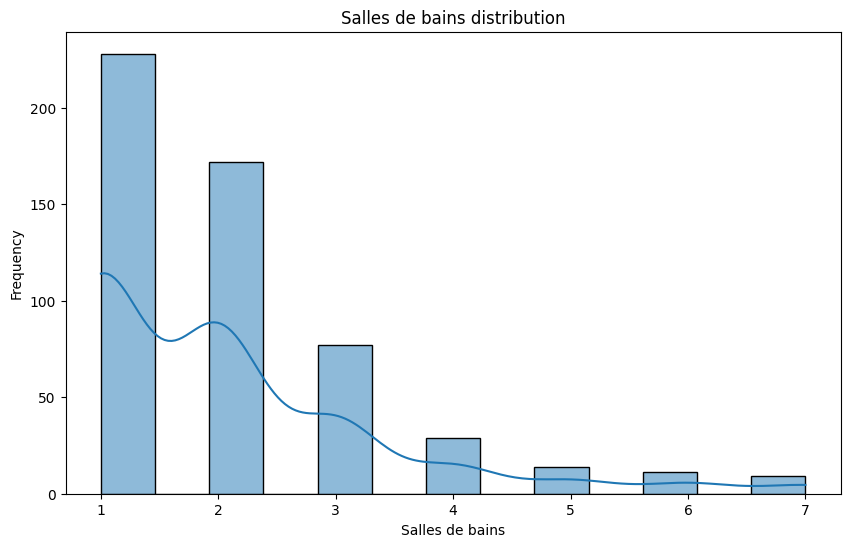

In [165]:
plot_distribution(df_clean['Salles de bains'],'Salles de bains distribution','Salles de bains')

In [166]:
# Replace missing values with mode since the distribution is categorical
df_clean['Salles de bains'].fillna(df_clean['Salles de bains'].mode()[0], inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\2135588293.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Salles de bains'].fillna(df_clean['Salles de bains'].mode()[0], inplace=True)


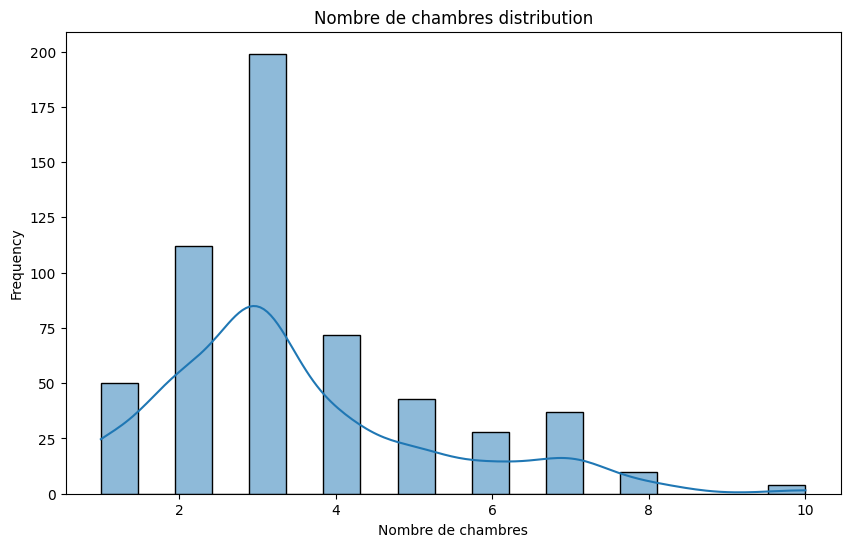

In [167]:
plot_distribution(df_clean['Chambres'],'Nombre de chambres distribution','Nombre de chambres')

In [168]:
# Replace missing values with mode since the distribution is categorical
df_clean['Chambres'].fillna(df_clean['Chambres'].mode()[0], inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\3383310863.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Chambres'].fillna(df_clean['Chambres'].mode()[0], inplace=True)


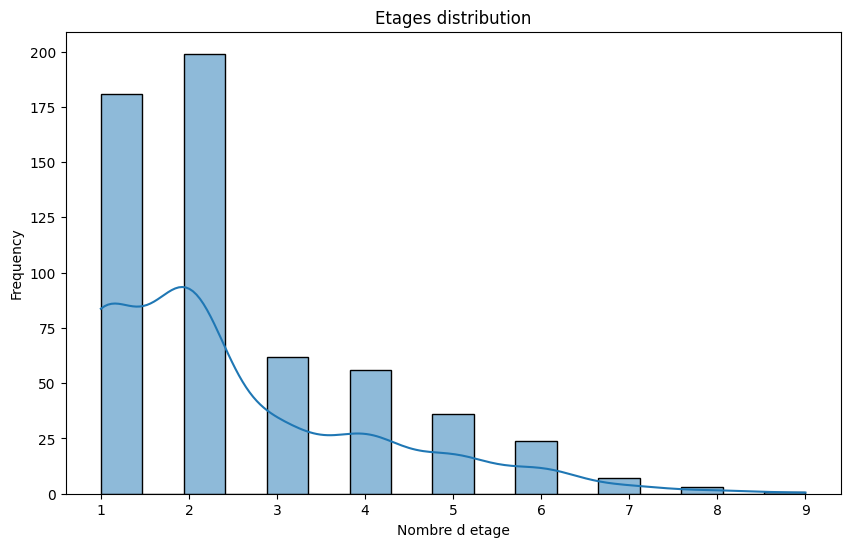

In [169]:
plot_distribution(df_clean['Etages'],'Etages distribution','Nombre d etage')

In [170]:
# Replace missing values with mode since the distribution is categorical
df_clean['Etages'].fillna(df_clean['Etages'].mode()[0], inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\1566603011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Etages'].fillna(df_clean['Etages'].mode()[0], inplace=True)


In [171]:
#df_clean = df_clean[(np.abs(stats.zscore(df_clean["prix"])) < 3)]

In [172]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to numerical columns
for col in ["prix", "Habitable", "Total","Terrain", "Pièces"]:
    df_clean = remove_outliers_iqr(df_clean, col)


In [173]:
df_clean['prix'].describe()

count    4.760000e+02
mean     4.446787e+05
std      3.094192e+05
min      0.000000e+00
25%      2.679700e+05
50%      3.860000e+05
75%      5.729032e+05
max      1.604048e+06
Name: prix, dtype: float64

In [174]:
df_clean = df_clean[df_clean['prix'] > 0]

In [175]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 0 to 24
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          442 non-null    object 
 1   Habitable        443 non-null    float64
 2   Terrain          443 non-null    float64
 3   Total            443 non-null    float64
 4   Pièces           443 non-null    float64
 5   Salles de bains  443 non-null    float64
 6   Chambres         443 non-null    float64
 7   Garage           443 non-null    int64  
 8   Jardin           443 non-null    int64  
 9   Balcon           443 non-null    int64  
 10  Meublé           443 non-null    int64  
 11  Piscine          443 non-null    int64  
 12  Etages           443 non-null    float64
 13  prix             443 non-null    float64
 14  Type             422 non-null    object 
dtypes: float64(8), int64(5), object(2)
memory usage: 55.4+ KB


### Feature engineering

In [176]:
#this part gets us the latitude and longitude 
geolocator = Nominatim(user_agent="my_unique_app_12345")

def get_coordinates(address):
    try:
        location = geolocator.geocode(address, timeout=10)  # Increase timeout
        if location:
            return pd.Series([location.latitude, location.longitude])
    except GeocoderTimedOut:
        time.sleep(1)  # Wait and retry in case of timeout
        return get_coordinates(address)  # Retry
    return pd.Series([None, None])

df_clean[['Latitude', 'Longitude']] = df_clean['address'].apply(get_coordinates)
df_clean[['address','Latitude','Longitude']].head()

,address,Latitude,Longitude
0,Ennasr 1-2 - Ariana - Tunisie,36.862262,10.169746
12,Bouficha - 4010 - Bouficha - Sousse - Tunisie,36.301456,10.454091
13,Borj Chakir - Sidi Hassine - Tunis - Tunisie,36.753115,10.068519
14,Borj Chakir - Sidi Hassine - Tunis - Tunisie,36.753115,10.068519
17,Ennasr 1-2 - Ariana - Tunisie,36.862262,10.169746


In [177]:
df_clean=df_clean.drop(columns=['address'])
df_clean.head()

,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Type,Latitude,Longitude
0,122.00,122.0,192.00,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,Residential,36.862262,10.169746
12,13.85,180.0,13.85,4.0,1.0,3.0,0,0,0,0,0,2.0,380000.0,Land,36.301456,10.454091
13,163.00,180.0,192.00,4.0,1.0,3.0,0,0,0,0,0,2.0,800.0,Other,36.753115,10.068519
14,163.00,180.0,192.00,4.0,1.0,3.0,0,0,0,0,0,2.0,350.0,Land,36.753115,10.068519
17,122.00,122.0,192.00,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,Residential,36.862262,10.169746


In [178]:
from sklearn.impute import KNNImputer
# Assuming df is your dataframe
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors
df_clean[['Latitude', 'Longitude']] = imputer.fit_transform(df_clean[['Latitude', 'Longitude']])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 0 to 24
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Habitable        443 non-null    float64
 1   Terrain          443 non-null    float64
 2   Total            443 non-null    float64
 3   Pièces           443 non-null    float64
 4   Salles de bains  443 non-null    float64
 5   Chambres         443 non-null    float64
 6   Garage           443 non-null    int64  
 7   Jardin           443 non-null    int64  
 8   Balcon           443 non-null    int64  
 9   Meublé           443 non-null    int64  
 10  Piscine          443 non-null    int64  
 11  Etages           443 non-null    float64
 12  prix             443 non-null    float64
 13  Type             422 non-null    object 
 14  Latitude         443 non-null    float64
 15  Longitude        443 non-null    float64
dtypes: float64(10), int64(5), object(1)
memory usage: 58.8+ KB


In [179]:
""""
df_geo=df_clean[['address','Latitude','Longitude']]
df_geo=df_geo.drop_duplicates()
df_geo=df_geo.dropna()
df_geo.to_csv('geocode_cache.csv', index=False)
"""

'"\ndf_geo=df_clean[[\'address\',\'Latitude\',\'Longitude\']]\ndf_geo=df_geo.drop_duplicates()\ndf_geo=df_geo.dropna()\ndf_geo.to_csv(\'geocode_cache.csv\', index=False)\n'

### Encoding

In [180]:
df_clean.head(1)

,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Type,Latitude,Longitude
0,122.0,122.0,192.0,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,Residential,36.862262,10.169746


In [181]:
# Find the most frequent (mode) value
most_frequent = df_clean['Type'].mode()[0]
# Fill missing values with the most frequent value
df_clean['Type'].fillna(most_frequent, inplace=True)
df_encoded = pd.get_dummies(df_clean, columns=['Type'], drop_first=True)
df_encoded.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_14516\2319487793.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Type'].fillna(most_frequent, inplace=True)


,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Latitude,Longitude,Type_Land,Type_Other,Type_Residential
0,122.00,122.0,192.00,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,36.862262,10.169746,False,False,True
12,13.85,180.0,13.85,4.0,1.0,3.0,0,0,0,0,0,2.0,380000.0,36.301456,10.454091,True,False,False
13,163.00,180.0,192.00,4.0,1.0,3.0,0,0,0,0,0,2.0,800.0,36.753115,10.068519,False,True,False
14,163.00,180.0,192.00,4.0,1.0,3.0,0,0,0,0,0,2.0,350.0,36.753115,10.068519,True,False,False
17,122.00,122.0,192.00,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,36.862262,10.169746,False,False,True


In [182]:
bool_columns = ["Type_Land", "Type_Other", "Type_Residential"]
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)
df_encoded.head()

,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Latitude,Longitude,Type_Land,Type_Other,Type_Residential
0,122.00,122.0,192.00,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,36.862262,10.169746,0,0,1
12,13.85,180.0,13.85,4.0,1.0,3.0,0,0,0,0,0,2.0,380000.0,36.301456,10.454091,1,0,0
13,163.00,180.0,192.00,4.0,1.0,3.0,0,0,0,0,0,2.0,800.0,36.753115,10.068519,0,1,0
14,163.00,180.0,192.00,4.0,1.0,3.0,0,0,0,0,0,2.0,350.0,36.753115,10.068519,1,0,0
17,122.00,122.0,192.00,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,36.862262,10.169746,0,0,1


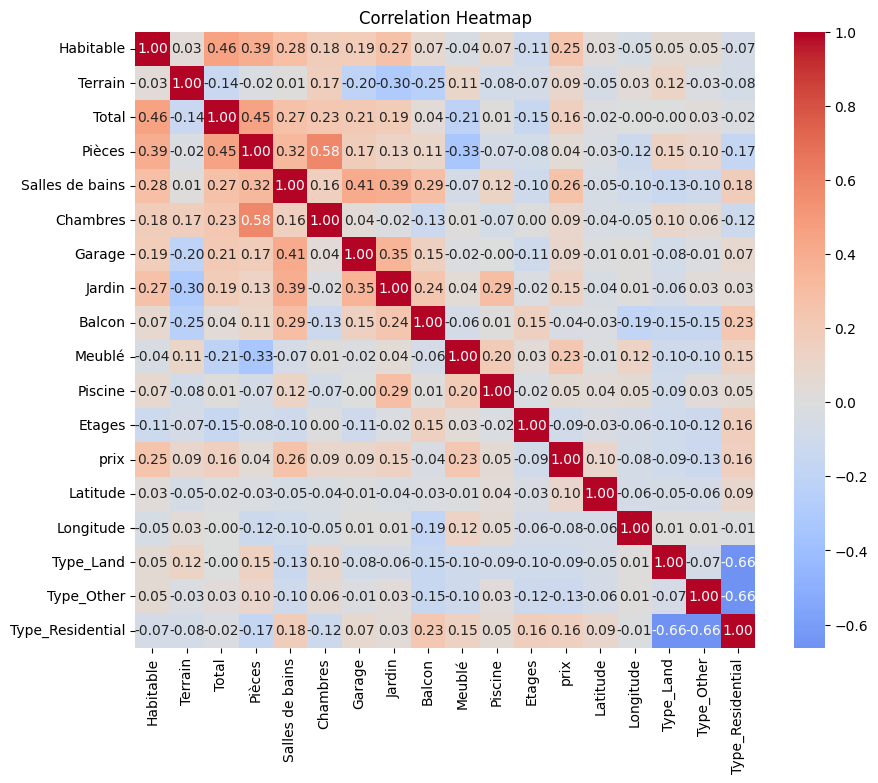

In [183]:
# Filter only numeric columns
df_numeric = df_encoded.select_dtypes(include=["number"])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()


In [184]:
syn_df=pd.read_csv('synthatic_data_vente.csv')
syn_df=syn_df.drop(columns='Unnamed: 0')
syn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Habitable         5000 non-null   float64
 1   Terrain           5000 non-null   float64
 2   Total             5000 non-null   float64
 3   Pièces            5000 non-null   float64
 4   Salles de bains   5000 non-null   float64
 5   Chambres          5000 non-null   float64
 6   Garage            5000 non-null   int64  
 7   Jardin            5000 non-null   int64  
 8   Balcon            5000 non-null   int64  
 9   Meublé            5000 non-null   int64  
 10  Piscine           5000 non-null   int64  
 11  Etages            5000 non-null   float64
 12  prix              5000 non-null   float64
 13  Latitude          5000 non-null   float64
 14  Longitude         5000 non-null   float64
 15  Type_Land         5000 non-null   int64  
 16  Type_Other        5000 non-null   int64  


In [185]:
final_df=pd.concat([df_encoded,syn_df])
final_df.shape

(5443, 18)

In [186]:
#final_df.to_csv('final_df_vente.csv') we are gonna use it to generate synthatic data 

### Building the model

In [187]:
X=final_df.drop(columns=['prix'])
y=final_df['prix']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [188]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5443 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Habitable         5443 non-null   float64
 1   Terrain           5443 non-null   float64
 2   Total             5443 non-null   float64
 3   Pièces            5443 non-null   float64
 4   Salles de bains   5443 non-null   float64
 5   Chambres          5443 non-null   float64
 6   Garage            5443 non-null   int64  
 7   Jardin            5443 non-null   int64  
 8   Balcon            5443 non-null   int64  
 9   Meublé            5443 non-null   int64  
 10  Piscine           5443 non-null   int64  
 11  Etages            5443 non-null   float64
 12  Latitude          5443 non-null   float64
 13  Longitude         5443 non-null   float64
 14  Type_Land         5443 non-null   int64  
 15  Type_Other        5443 non-null   int64  
 16  Type_Residential  5443 non-null   int64  
dtype

This code is used to find the best hyperparameters

In [ ]:
"""
# Define parameter grid
param_grid = {
    "n_estimators": [500, 700, 900],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [5, 7, 9],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [3, 5, 7],
    "subsample": [0.7, 0.9]
}

# Initialize model
gb_regressor = GradientBoostingRegressor(random_state=41)

# Perform Grid Search
grid_search = GridSearchCV(
    gb_regressor, param_grid=param_grid,
    cv=5, scoring="neg_root_mean_squared_error",
    n_jobs=-1, verbose=1
)

# Fit the search
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Hyperparameters:", grid_search.best_params_)

"""

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 500, 'subsample': 0.9}


In [192]:
sgb = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=9,
    min_samples_leaf=3,
    min_samples_split=5,
    n_estimators=500,
    subsample=0.9,
    random_state=42
)

# ✅ Train the model
sgb.fit(X_train, y_train)

# ✅ Predict on test data
y_pred = sgb.predict(X_test)

# ✅ Compute Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ Print results
print(f"🔹 Real RMSE: {rmse:.2f}")
print(f"🔹 Mean Absolute Error: {mae:.2f}")
print(f"🔹 R² Score: {r2:.4f}")


🔹 Real RMSE: 46612.07
🔹 Mean Absolute Error: 7119.90
🔹 R² Score: 0.9765


### Download the model

In [191]:
with open('model_vente','wb') as f:
    pickle.dump(sgb,f)